In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sklearn
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

1. Download the data for your ticker symbol (Walmart) from yahoo finance as a csv file with maximum history.

In [3]:
filePath = './WMT.csv'
df = pd.read_csv(filePath)
df = df.dropna()

print(df.shape)
df.head()

(3585, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-25,17.713333,17.740000,17.593332,17.626667,12.867806,36009900
1,2010-01-26,17.606667,17.953333,17.576668,17.870001,13.045444,46752000
2,2010-01-27,17.840000,17.923332,17.700001,17.799999,12.994342,39576300
3,2010-01-28,17.793333,17.816668,17.503332,17.536667,12.802105,50880300
4,2010-01-29,17.893333,18.049999,17.799999,17.809999,13.001641,72842400


2. Plot Prices for Data

In [15]:
# Getting Plotting Data
date = np.array(df['Date'])
adj_close = np.array(df['Adj Close'])

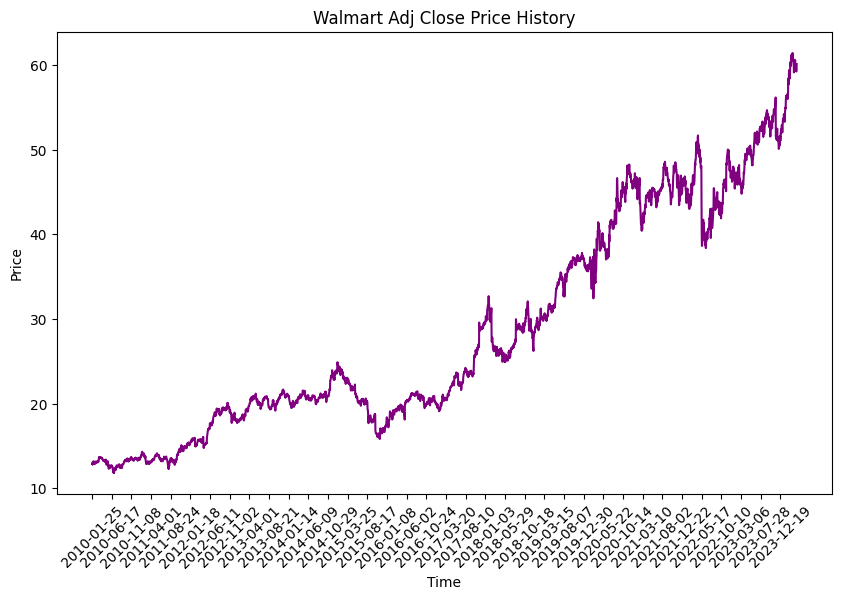

In [16]:
# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(date, adj_close, color = 'purple')
plt.title('Walmart Adj Close Price History')
plt.ylabel('Price')
plt.xlabel('Time')
plt.xticks(date[::100])
plt.xticks(rotation=45)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_26576\3570802184.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


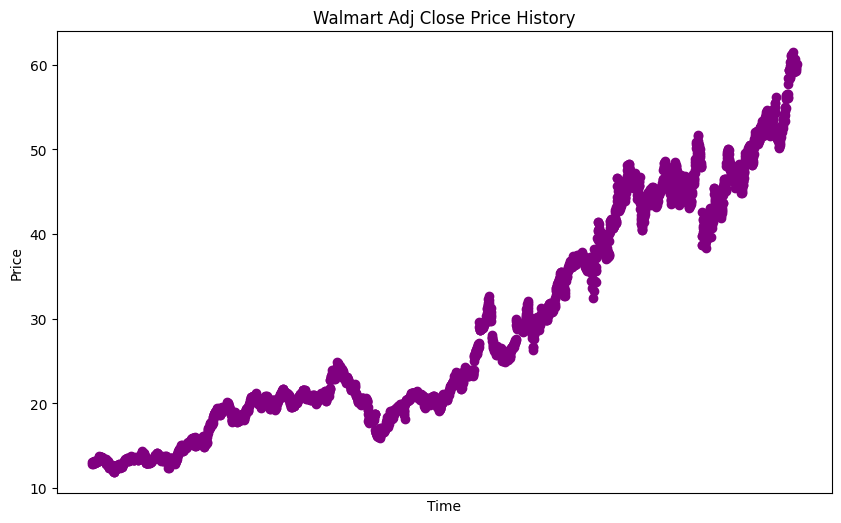

In [17]:
# Scatter plot
plt.figure(figsize=(10,6))
plt.title('Walmart Adj Close Price History')
plt.scatter(date, adj_close, color='purple')
plt.ylabel('Price')
plt.xlabel('Time')
plt.xticks([])
plt.show()

3. Plot log-returns for the given data.

In [19]:
# Computing the log returns
log_Returns = np.log(df['Adj Close']).diff()
log_Returns = log_Returns.dropna()

log_Returns.head()

1    0.013710
2   -0.003925
3   -0.014904
4    0.015466
5    0.000935
Name: Adj Close, dtype: float64

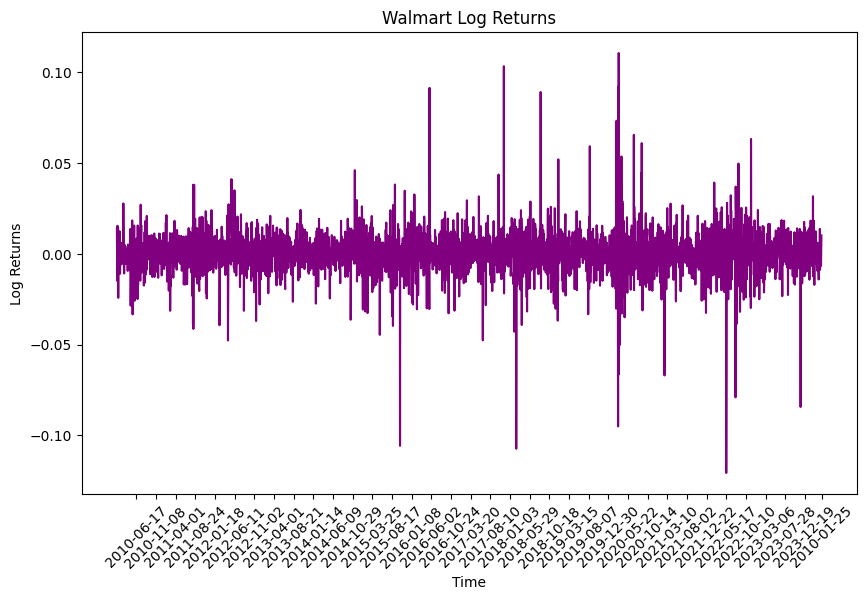

In [21]:
# Plotting the log returns
plt.figure(figsize=(10,6))
plt.plot(date[1:], np.array(log_Returns), color = 'purple')
plt.title('Walmart Log Returns')
plt.ylabel('Log Returns')
plt.xlabel('Time')
plt.xticks(date[::100])
plt.xticks(rotation=45)
plt.show()


In [22]:
# Mean and Standard Deviation
mean = log_Returns.mean()
std = log_Returns.std()
print('Mean: ', mean)
print('Standard Deviation: ', std)

Mean:  0.00043023064392502575
Standard Deviation:  0.01208987250577309


4. Check whether log-returns are normally distributed using QQ plot,
histogram and other statistical test like (Jerq-Berra, Kolmogorov-Smirnov
test)

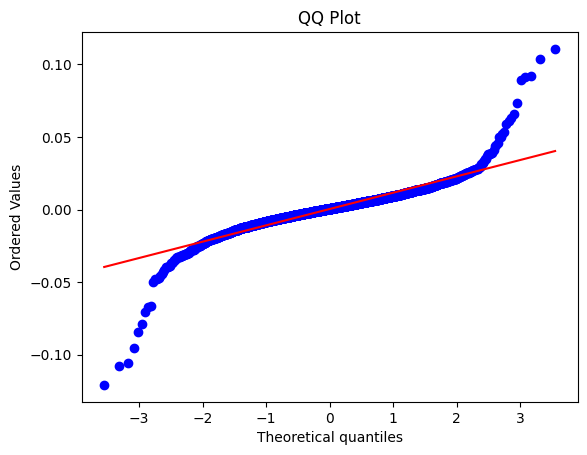

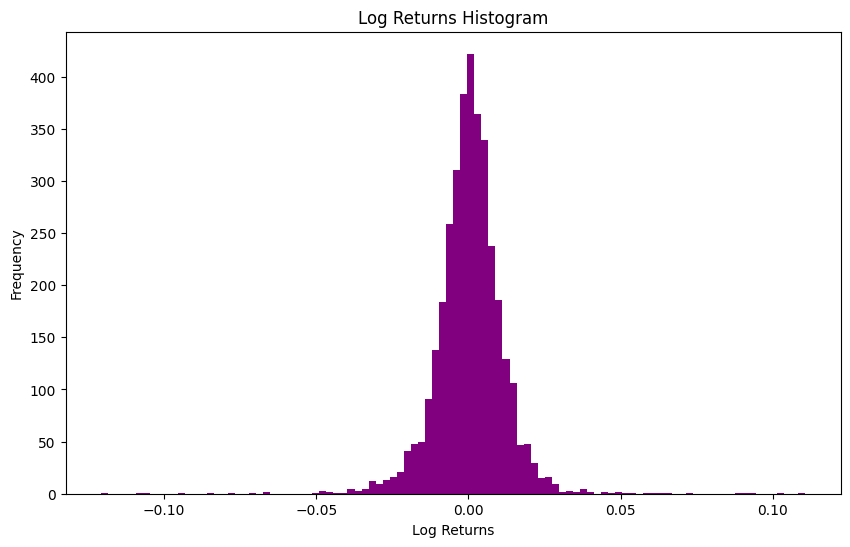

In [23]:
# 4.1 QQ Plot
stats.probplot(log_Returns, dist="norm", plot=pylab)
pylab.title('QQ Plot')
pylab.show()


# 4.1 Histogram
plt.figure(figsize=(10,6))
plt.hist(log_Returns, bins=100, color='purple')
plt.title('Log Returns Histogram')
plt.ylabel('Frequency')
plt.xlabel('Log Returns')
plt.show()

In [24]:
# 4.2 Statistical Test to check normality
from scipy.stats import shapiro, jarque_bera, kstest

# 4.2.1 Shapiro-Wilk Test
stat, p = shapiro(log_Returns)
print('Shapiro Wilk Test')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print('\n')

# 4.2.2 Jerq-Berra Test
stat, p = jarque_bera(log_Returns)
print('Jerq-Berra Test')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print('\n')

# 4.2.3 Kolmogorov-Smirnov Test
stat, p = kstest(log_Returns, 'norm')
print('Kolmogorov-Smirnov Test')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro Wilk Test
Statistics=0.867, p=0.000
Sample does not look Gaussian (reject H0)


Jerq-Berra Test
Statistics=41047.391, p=0.000
Sample does not look Gaussian (reject H0)


Kolmogorov-Smirnov Test
Statistics=0.480, p=0.000
Sample does not look Gaussian (reject H0)


So, according to all the above tests, we can conclude whether the log-returns are not normally distributed.

5. Estimate the historical volatility using log returns.

In [25]:
# Estimate the historical volatility using log returns.
volatility = std
print('Historical Volatility: ', volatility)
print("Historical volatility (annualized):", volatility * np.sqrt(252))  # Assuming 252 trading days in a year

Historical Volatility:  0.01208987250577309
Historical volatility (annualized): 0.1919207761965174


6. Identify the risk free rate for the given currency (3-Months treasury rate for the currency)

In [116]:
import yfinance as yf
ticker_symbol = "^IRX"  # This is the ticker symbol for the 3-month Treasury rate
data = yf.download(ticker_symbol, period="1d")

# Extract the most recent risk-free rate
risk_free_rate = data['Adj Close'].iloc[-1] / 100  # Adjusted close divided by 100 to get the rate in decimal

print("Current 3-Month Treasury Rate (Risk-Free Rate): {:.2%}".format(risk_free_rate))

[*********************100%%**********************]  1 of 1 completed

Current 3-Month Treasury Rate (Risk-Free Rate): 5.23%


7. Test the assumption if the log-returns are independent/uncorrelated.

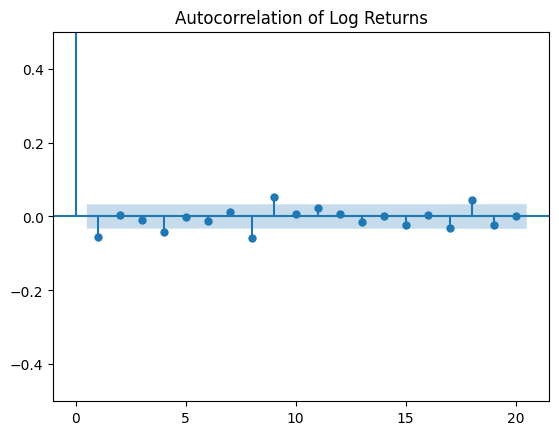

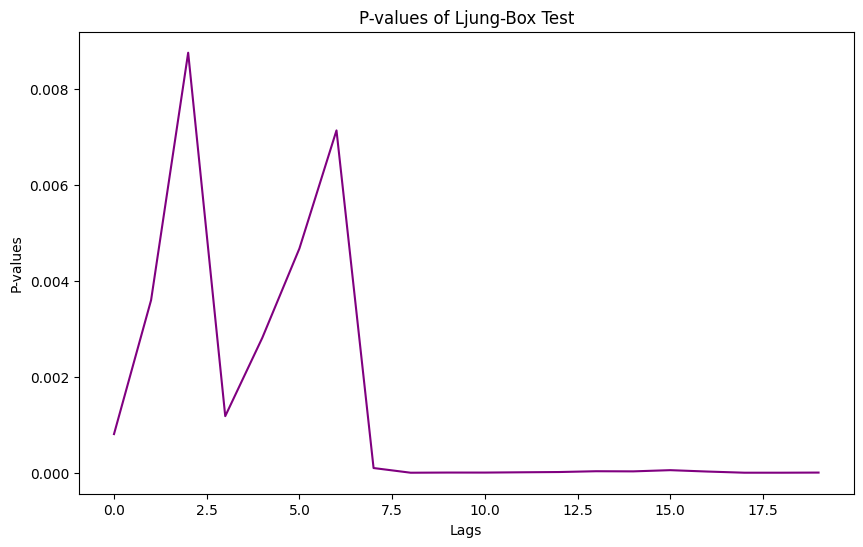

Ljung-Box Test
Smaller P_value: 0.0008078679591323609
The log returns are autocorrelated (reject H0)


In [117]:
# Test the assumption if the log-returns are independent/uncorrelated.
# 5.1 Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(log_Returns, lags=20, alpha=0.05)
plt.title('Autocorrelation of Log Returns')
plt.ylim(-0.5, 0.5)
plt.show()


# 5.2 Ljung-Box Test
from statsmodels.stats.diagnostic import acorr_ljungbox
stat = acorr_ljungbox(log_Returns, lags=20)
p_values = np.array(stat.lb_pvalue, dtype=float)

# plot the p-values
plt.figure(figsize=(10,6))
plt.plot(p_values, color='purple')
plt.title('P-values of Ljung-Box Test')
plt.ylabel('P-values')
plt.xlabel('Lags')
plt.show()

print('Ljung-Box Test')
alpha = float(0.05)

p_less_than_alpha = p_values[p_values < alpha]
if len(p_less_than_alpha) > 0:
    print("Smaller P_value:", p_less_than_alpha[0])
    print('The log returns are autocorrelated (reject H0)')
else:
    print('The log returns are not autocorrelated (fail to reject H0)')

Thus, The log returns are autocorrelated (based on Ljung-Box Test and ACF plot)

8. Calculate the option price for an In-The-Money (ITM) European call option and In-The-Money European put option for the maturity May 31, 2024.

In [96]:
# Base class for option pricing
class OptionPricing():
 def __init__(self, S, K_call,K_put, r, T, sigma):
    self.S = S
    self.K_call = K_call
    self.K_put = K_put
    self.r = r
    self.T = T
    self.sigma = sigma
    def call_price(self):
        pass
    def put_price(self):
        pass
    def price(self, option_type):
        if option_type == 'call':
            call_price = self.call_price()
            return call_price
        elif option_type == 'put':
            put_price = self.put_price()
            return put_price
        else:
            raise ValueError('Option type must be either "call" or "put"')

# Black-Scholes model for option pricing
class BlackScholes( ):
    def __init__(self, S, K_call,K_put, r, T, sigma):
        self.S = S
        self.K_call = K_call
        self.K_put = K_put
        self.r = r
        self.T = T
        self.sigma = sigma

    def call_price(self):
        self.d1 = (np.log(self.S / self.K_call) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
        self.d2 = self.d1 - self.sigma * np.sqrt(self.T)
        call = self.S * stats.norm.cdf(self.d1) - self.K_call * np.exp(-self.r * self.T) * stats.norm.cdf(self.d2)
        return call

    def put_price(self):
        self.d1 = (np.log(self.S / self.K_put) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
        self.d2 = self.d1 - self.sigma * np.sqrt(self.T)
        put = self.K_put * np.exp(-self.r * self.T) * stats.norm.cdf(-self.d2) - self.S * stats.norm.cdf(-self.d1)
        return put

# Binomial model for option pricing
class CRR():
    def __init__(self, S, K_call,K_put, r, T, sigma,n):
        self.S = S
        self.K_call = K_call
        self.K_put = K_put
        self.r = r
        self.T = T
        self.sigma = sigma

        # n: Number of time steps
        self.n = n
        # dt: Size of the time step
        self.dt = T / self.n 
        # u: Factor by which the stock price increases in each time step
        self.u = math.exp(sigma * math.sqrt(self.dt))
        # d: Factor by which the stock price decreases in each time step
        self.d = 1 / self.u 
         # p: Risk-neutral probability of the stock price going up
        self.p = (math.exp(self.r * self.dt) - self.d) / (self.u - self.d)
         # prices: Array to store the stock prices at each time step
        self.prices = np.zeros((n + 1, n + 1))
        # Initialize the stock prices at time 0
        self.prices[0, 0] = S

    def call_price(self):
        n = self.n
        return self.my_crr_option_price('call', n)

    def put_price(self):
        n = self.n
        return self.my_crr_option_price('put', n)

    def my_crr_option_price(self,option_type, n=1000):
        for i in range(1, n + 1):
            self.prices[i, 0] = self.prices[i - 1, 0] * self.u
            for j in range(1, i + 1):
                self.prices[i, j] = self.prices[i - 1, j - 1] * self.d
                
        option_prices = np.zeros((n + 1, n + 1))
        for j in range(n + 1):
            option_prices[n, j] = max(0, self.prices[n, j] - self.K_call) if option_type == 'call' else max(0, self.K_put - self.prices[n, j])

        for i in range(n - 1, -1, -1):
            for j in range(i + 1):
                option_prices[i, j] = math.exp(-self.r * self.dt) * (self.p * option_prices[i + 1, j] + (1 - self.p) * option_prices[i + 1, j + 1])
        return option_prices[0, 0]

# Monte Carlo Simulation for option pricing
class MonteCarloSimulationPricing(OptionPricing):
    def __init__(self, S, K_call,K_put, r, T, sigma,n, num_simulations, show_plot=False):
        self.S = S
        self.K_call = K_call
        self.K_put = K_put
        self.r = r
        self.T = T
        self.sigma = sigma

        # n: Number of time steps
        self.n = n
        # num_simulations: Number of simulations
        self.num_simulations = num_simulations
        # dt: Size of the time step
        self.T = T
        # dt: Size of the time step
        self.dt = T / self.n

        self.show_plot= show_plot

    def call_price(self):
            prices = np.zeros((self.num_simulations, self.n + 1))
            prices[:, 0] = self.S
            for i in range(1, self.n + 1):
                z = np.random.normal(size=self.num_simulations)
                prices[:, i] = prices[:, i - 1] * np.exp((self.r - 0.5 * self.sigma ** 2) * self.dt + self.sigma * np.sqrt(self.dt) * z)
                option_prices = np.maximum(0, prices[:, -1] - self.K_call)
            if self.show_plot:
                for i in range(50):
                    plt.plot(prices[i])
                plt.xlabel('Time Steps')
                plt.ylabel('Stock Price')
                plt.title('Stock Price Path for Call Option Pricing using Monte Carlo Simulation')
                plt.show()
            return np.mean(option_prices) * np.exp(-self.r * self.T)

    def put_price(self):
            prices = np.zeros((self.num_simulations, self.n + 1))
            prices[:, 0] = self.S
            for i in range(1, self.n + 1):
                z = np.random.normal(size=self.num_simulations)
                prices[:, i] = prices[:, i - 1] * np.exp((self.r - 0.5 * self.sigma ** 2) * self.dt + self.sigma * np.sqrt(self.dt) * z)
                option_prices = np.maximum(0, self.K_put - prices[:, -1])
            if self.show_plot:
                for i in range(50):
                    plt.plot(prices[i])
                plt.xlabel('Time Steps')
                plt.ylabel('Stock Price')
                plt.title(' Stock Price Path for Put Option Pricing using Monte Carlo Simulation')
                plt.show()
            return np.mean(option_prices) * np.exp(-self.r * self.T)


In [97]:
# Testing Variables:
import datetime

# currect price of the stock (today): 59.82 USD Walmart
# for in the money call option
K_call = 55

# for in the money put option
K_put = 65

S = df['Adj Close'].iloc[-1] 

# risk free rate as 3 month treasury rate
r = risk_free_rate 

T = (datetime.datetime(2024, 5, 31) - datetime.datetime.now()).days /365 

sigma = volatility * np.sqrt(252)


# !pip install tabulate ## uncomment this line if you don't have tabulate installed
from tabulate import tabulate
print(tabulate([['Current Stock Price', S], ['Strike Price for Call Option', K_call], ['Strike Price for Put Option', K_put], ['Risk-Free Rate', r], ['Time to Maturity (in years)', T], ['Volatility', sigma]], headers=['Parameter', 'Value'], tablefmt='orgtbl'))

| Parameter                    |      Value |
|------------------------------+------------|
| Current Stock Price          | 60.14      |
| Strike Price for Call Option | 55         |
| Strike Price for Put Option  | 65         |
| Risk-Free Rate               |  0.05235   |
| Time to Maturity (in years)  |  0.0712329 |
| Volatility                   |  0.191921  |


In [102]:
def test_model(model_type, S, K_call,K_put, r, T, sigma):
    n = 60
    if model_type == 'Black-Scholes':
        model = BlackScholes(S, K_call,K_put, r, T, sigma)
    elif model_type == 'Binomial':
        model = CRR(S, K_call,K_put, r, T, sigma, n)
    elif model_type == 'Monte Carlo Simulation':
        model = MonteCarloSimulationPricing(S, K_call,K_put, r, T, sigma, 10000, 1000, True)
    else:
        raise ValueError('Model type must be either "Black-Scholes", "Binomial", or "Monte Carlo Simulation"')

    call_price = model.call_price()
    put_price = model.put_price()

    result = {'Model': model_type, 'Call Price': call_price, 'Put Price': put_price}
    return result


def test_all_models():
    results = []
    print('Testing all models')
    
    print('Current Stock Price:', S)
    print('Strike Price for Call Option:', K_call)
    print('Strike Price for Put Option:', K_put)
    print('Risk-Free Rate:', r)
    print('Time to Maturity (in years):', T)
    print('Volatility:', sigma)

    for model_type in ['Black-Scholes', 'Binomial', 'Monte Carlo Simulation']:
        result = test_model(model_type, S, K_call,K_put, r, T, sigma)
        results.append(result)
    
    results_df = pd.DataFrame(results)
    return results_df

9. Use CRR, Black-Scholes and Simulation Methods to compute the option
prices.

Testing all models
Current Stock Price: 60.139999
Strike Price for Call Option: 55
Strike Price for Put Option: 65
Risk-Free Rate: 0.05234999656677246
Time to Maturity (in years): 0.07123287671232877
Volatility: 0.1919207761965174


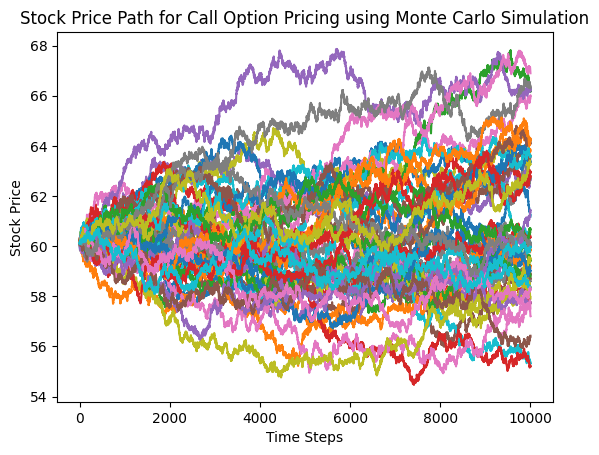

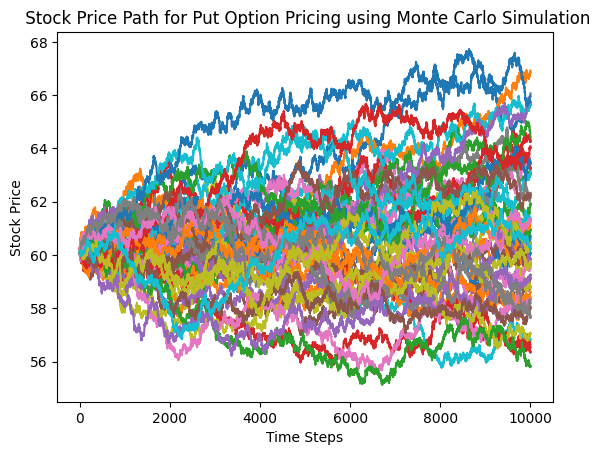

In [104]:
# 9 Test all models using Historical Volatility
historical_results_df = test_all_models()

In [105]:
# Results for all models (using Historical Volatility)
historical_results_df

,Model,Call Price,Put Price
0,Black-Scholes,5.384919,4.724268
1,Binomial,5.384599,4.722585
2,Monte Carlo Simulation,5.397097,4.596272


10. Use method to estimate the volatility parameter (like GARACH or Stochastic volatility methods)

In [94]:
# using GARCH model to estimate the volatility

# !pip install arch ## uncomment this line if you don't have arch installed

from arch import arch_model

scaled_returns = log_Returns * 100
model = arch_model(scaled_returns, vol='GARCH', p=1, q=1, rescale=False)
model_fit = model.fit(disp='off')

# Forecasting the volatility
forecast = model_fit.forecast(horizon=1)
forecast_volatility = forecast.variance.values[-1][0] / 100

print('Forecasted Volatility using GARCH Model: ', forecast_volatility)
print("Forecasted Volatility (annualized):", forecast_volatility * np.sqrt(252))  # Assuming 252 trading days in a year

print('Historical Volatility: ', volatility)
print("Historical Volatility (annualized):", volatility * np.sqrt(252))  # Assuming 252 trading days in a year


Forecasted Volatility using GARCH Model:  0.00956439416186833
Forecasted Volatility (annualized): 0.1518300503598099
Historical Volatility:  0.01208987250577309
Historical Volatility (annualized): 0.1919207761965174


Testing all models
Current Stock Price: 60.139999
Strike Price for Call Option: 55
Strike Price for Put Option: 65
Risk-Free Rate: 0.05234999656677246
Time to Maturity (in years): 0.07123287671232877
Volatility: 0.1518300503598099


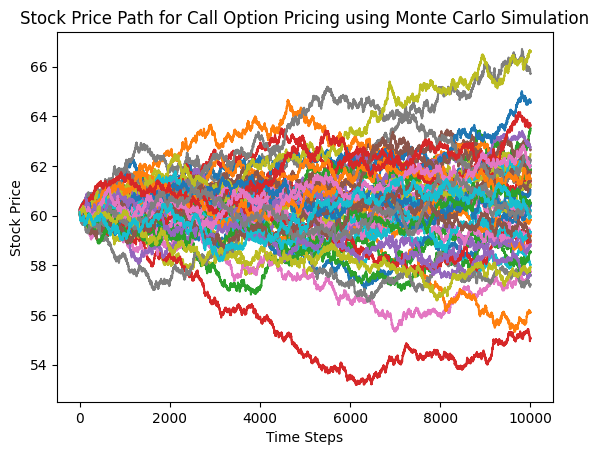

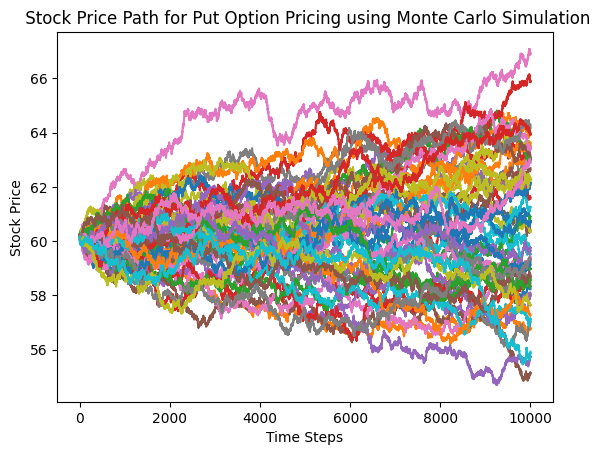

In [107]:
# Testing the models using GARCH volatility (forecasted volatility)
sigma = forecast_volatility * np.sqrt(252)

# Results for all models (using GARCH Volatility)
garch_results_df = test_all_models()

In [108]:
garch_results_df

,Model,Call Price,Put Price
0,Black-Scholes,5.353312,4.651888
1,Binomial,5.353173,4.651530
2,Monte Carlo Simulation,5.307593,4.602076


In [115]:
# Comparing the results using Historical and GARCH Volatility
combined_Results = historical_results_df.join(garch_results_df.set_index('Model'), on='Model', lsuffix='_historical', rsuffix='_forecasted')
combined_Results = combined_Results[['Model', 'Call Price_historical', 'Put Price_historical', 'Call Price_forecasted', 'Put Price_forecasted']]
combined_Results

,Model,Call Price_historical,Put Price_historical,Call Price_forecasted,Put Price_forecasted
0,Black-Scholes,5.384919,4.724268,5.353312,4.651888
1,Binomial,5.384599,4.722585,5.353173,4.651530
2,Monte Carlo Simulation,5.397097,4.596272,5.307593,4.602076
